In [28]:
import numpy as np
import time
import pandas as pd

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
mnist = datasets.fetch_openml('mnist_784') 

In [4]:
index = np.random.randint(70000, size=5000)
data = [mnist.data[index], mnist.target[index]]
xtrain, xtest, ytrain, ytest = train_test_split(data[0], data[1], test_size=0.2)

In [5]:
clf = SVC(kernel='linear', gamma='auto')
clf.fit(xtrain, ytrain)
print("score : {0}".format(clf.score(xtest, ytest)))

score : 0.904


In [31]:
kernels = ['linear','poly', 'rbf', 'sigmoid']

scores_test = []
scores_train = []
times_fit = []
recall_scores_train = []
recall_scores_test = []
erreur_test = []
erreur_train = []

for k in kernels:
    clf = SVC(kernel=k, gamma='auto')
    start = time.time()
    clf.fit(xtrain, ytrain)
    times_fit.append(time.time()-start)
        
    score_test = clf.score(xtest, ytest)
    score_train = clf.score(xtrain, ytrain)
    
    scores_test.append(score_test)
    scores_train.append(score_train)
    erreur_test.append(1-score_test)
    erreur_train.append(1-score_train)
    
    predicted_test = clf.predict(xtest)
    predicted_train = clf.predict(xtrain)
    
    recall_scores_test.append(recall_score(ytest, predicted_test, average='micro'))
    recall_scores_train.append(recall_score(ytrain, predicted_train, average='micro'))
    
    print('kernel : ' + k + ' score_test : {0}, score_train : {1}'.format(score_test, score_train))

kernel : linear score_test : 0.904, score_train : 1.0
kernel : poly score_test : 0.93, score_train : 1.0
kernel : rbf score_test : 0.15, score_train : 1.0
kernel : sigmoid score_test : 0.104, score_train : 0.11075


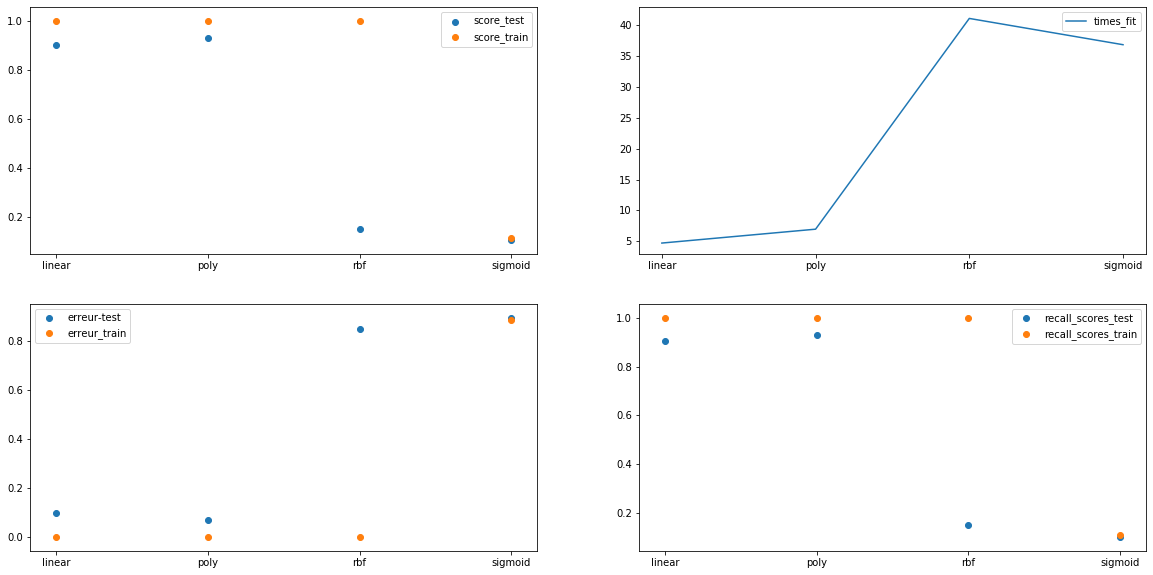

In [32]:
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.scatter(kernels, scores_test, label='score_test')
plt.scatter(kernels, scores_train, label='score_train')
plt.legend()

plt.subplot(222)
plt.plot(kernels, times_fit, label='times_fit')
plt.legend()

plt.subplot(223)
plt.scatter(kernels, erreur_test, label='erreur-test')
plt.scatter(kernels, erreur_train, label='erreur_train')
plt.legend()

plt.subplot(224)
plt.scatter(kernels, recall_scores_test, label='recall_scores_test')
plt.scatter(kernels, recall_scores_train, label='recall_scores_train')
plt.legend()

plt.show()

In [33]:
np.linspace(0.1, 1., 5)

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [34]:
cs = np.linspace(0.1, 1., 5)

scores_test = []
scores_train = []
times_fit = []
recall_scores_train = []
recall_scores_test = []
erreur_test = []
erreur_train = []

for c in cs:
    clf = SVC(kernel='poly', C=c, gamma='auto')
    start = time.time()
    clf.fit(xtrain, ytrain)
    times_fit.append(time.time()-start)
        
    score_test = clf.score(xtest, ytest)
    score_train = clf.score(xtrain, ytrain)
    
    scores_test.append(score_test)
    scores_train.append(score_train)
    erreur_test.append(1-score_test)
    erreur_train.append(1-score_train)
    
    predicted_test = clf.predict(xtest)
    predicted_train = clf.predict(xtrain)
    
    recall_scores_test.append(recall_score(ytest, predicted_test, average='micro'))
    recall_scores_train.append(recall_score(ytrain, predicted_train, average='micro'))
    
    print('c : {0}, score_test : {1}, score_train : {2}'.format(c, score_test, score_train))

c : 0.1, score_test : 0.93, score_train : 1.0
c : 0.325, score_test : 0.93, score_train : 1.0
c : 0.55, score_test : 0.93, score_train : 1.0
c : 0.775, score_test : 0.93, score_train : 1.0
c : 1.0, score_test : 0.93, score_train : 1.0


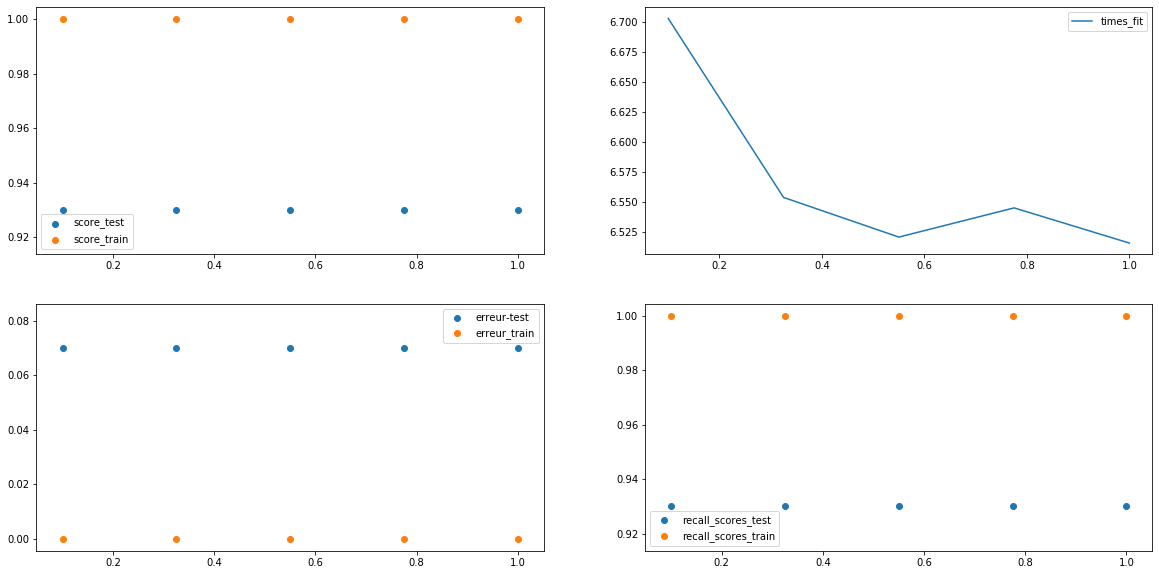

In [36]:
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.scatter(cs, scores_test, label='score_test')
plt.scatter(cs, scores_train, label='score_train')
plt.legend()

plt.subplot(222)
plt.plot(cs, times_fit, label='times_fit')
plt.legend()

plt.subplot(223)
plt.scatter(cs, erreur_test, label='erreur-test')
plt.scatter(cs, erreur_train, label='erreur_train')
plt.legend()

plt.subplot(224)
plt.scatter(cs, recall_scores_test, label='recall_scores_test')
plt.scatter(cs, recall_scores_train, label='recall_scores_train')
plt.legend()

plt.show()

In [25]:
clf = SVC(kernel='poly', C=1.0, gamma='auto')
clf.fit(xtrain, ytrain)
predicted = clf.predict(xtest)

In [26]:
cm = confusion_matrix(ytest, predicted)
cm_df = pd.DataFrame(cm)

cm_df

,0,1,2,3,4,5,6,7,8,9
0,86,0,1,0,0,1,1,0,1,0
1,0,100,0,0,0,0,0,0,1,0
2,2,3,98,0,1,3,1,1,1,0
3,2,5,2,90,0,3,0,1,1,0
4,0,0,0,0,91,0,0,0,1,2
5,0,0,1,3,0,90,1,2,0,0
6,0,1,1,0,0,2,100,0,0,0
7,0,2,1,1,0,0,0,109,1,4
8,1,1,1,0,2,1,0,1,89,1
9,0,0,0,0,6,0,1,0,1,77
